# import and prepare Data

In [1]:
import PIL
import numpy as np
from matplotlib.pyplot import imshow

In [ ]:
path = '../img/test/'
img1 = PIL.Image.open(path + 'Rothenberg.webp')
img2 = PIL.Image.open(path + 'de.webp')

In [3]:
img1.show()
# img2.show()

In [4]:
# img_data = np.asarray(img1)
img_data = np.asarray(img2)

img_data.shape

(1191, 2119, 3)

In [5]:
# grayscale or 1 channel
img_gs1 = PIL.ImageOps.grayscale(img1)
img_gs2 = PIL.ImageOps.grayscale(img2)
# img_gs.show()
img_data_gs1 = np.asarray(img_gs1)
img_data_gs2 = np.asarray(img_gs2)
print(img_data_gs1.shape)
print(img_data_gs2.shape)

(1451, 2580)
(1191, 2119)


# define Kernel and examples

In [6]:
# define kernels for convolution
knl_box_blur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
knl_identity = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
knl_edge_detect = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
knl_edge_detect_2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
knl_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
knl_emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
knl_gaussian_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
knls = [knl_box_blur, knl_identity, knl_edge_detect, knl_edge_detect_2, knl_sharpen, knl_emboss, knl_gaussian_blur]
len(knls)


7

In [17]:
def conv_knl(m, knl):
    li, lj = m.shape
    im = np.zeros((li-2, lj-2))
    i, j = 0, 0

    while j<lj-3:
        while i<li-3:
            res = 0
            for ii in range(3):
                for jj in range(3):
                    res += m[i+ii,j+jj] * knl[ii,jj]

            im[i,j] = res
            i += 1
        i = 0
        j += 1
    return im

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


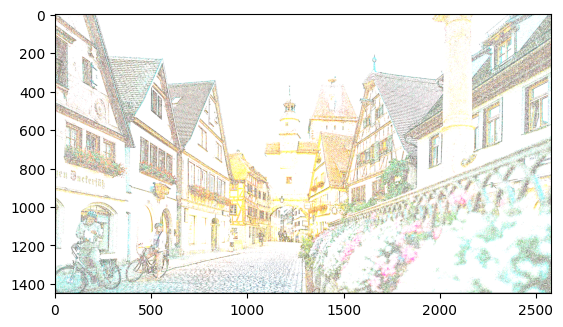

In [18]:
img_data = np.asarray(img1)

a = conv_knl(img_data[:, :, 0], knl_sharpen)
b = conv_knl(img_data[:, :, 1], knl_sharpen)
c = conv_knl(img_data[:, :, 2], knl_sharpen)
d = np.stack((a, b, c), axis=2)
imshow(d)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


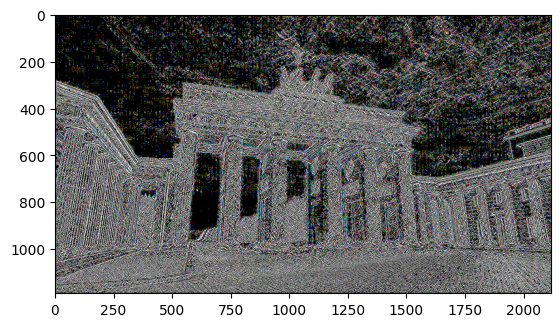

In [19]:
img_data = np.asarray(img2)

a = conv_knl(img_data[:, :, 0], knl_edge_detect)
b = conv_knl(img_data[:, :, 1], knl_edge_detect)
c = conv_knl(img_data[:, :, 2], knl_edge_detect)
d = np.stack((a, b, c), axis=2)
imshow(d)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


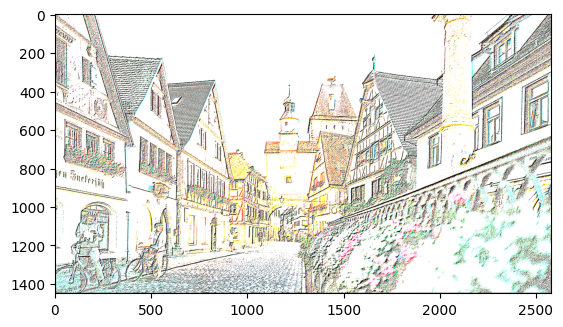

In [20]:
img_data = np.asarray(img1)

a = conv_knl(img_data[:, :, 0], knl_emboss)
b = conv_knl(img_data[:, :, 1], knl_emboss)
c = conv_knl(img_data[:, :, 2], knl_emboss)
d = np.stack((a, b, c), axis=2)
imshow(d)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


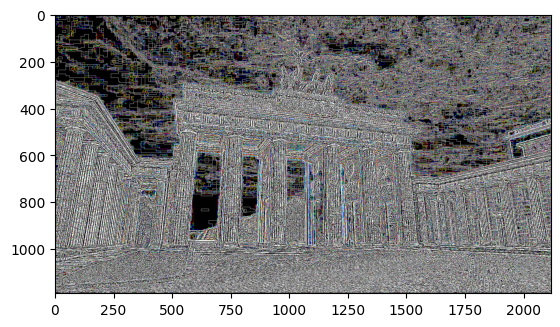

In [21]:
img_data = np.asarray(img2)

a = conv_knl(img_data[:, :, 0], knl_edge_detect_2)
b = conv_knl(img_data[:, :, 1], knl_edge_detect_2)
c = conv_knl(img_data[:, :, 2], knl_edge_detect_2)
d = np.stack((a, b, c), axis=2)
imshow(d)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


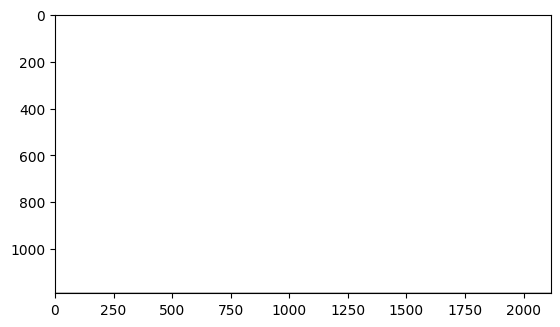

In [22]:
a = conv_knl(img_data[:, :, 0], knl_box_blur)
b = conv_knl(img_data[:, :, 1], knl_box_blur)
c = conv_knl(img_data[:, :, 2], knl_box_blur)
d = np.stack((a, b, c), axis=2)
imshow(d)

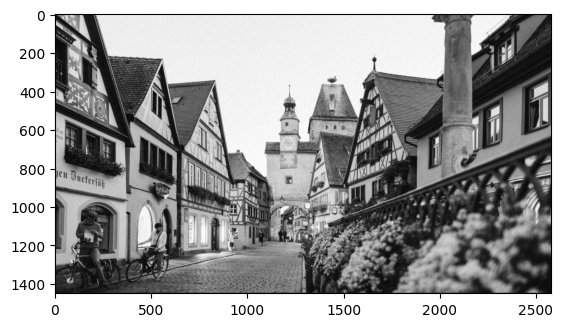

In [23]:
# from scipy.signal import convolve2d
# ba scipy mishe vali error ham dare

# apply kernels to images

m = img_data_gs1
ims = []
for knl in knls:
    i = conv_knl(m, knl)
    ims.append(i)

imshow(ims[0], cmap='gray')

# imshow(im, cmap='gray')


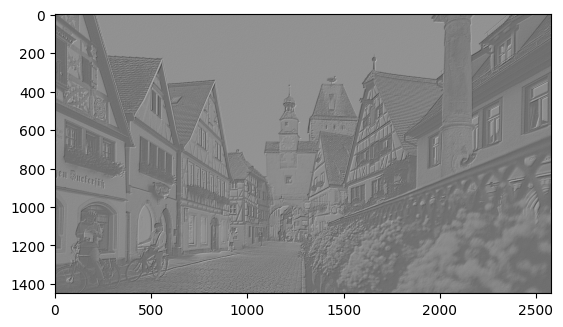

In [32]:
imshow(ims[5], cmap='gray')

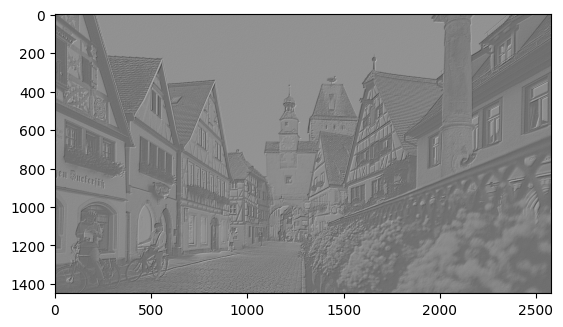

In [25]:
k = knl_emboss
a = conv_knl(img_data_gs1, k)
# a = conv_knl(a, k)
imshow(a, cmap='gray')

# define Pooling

In [48]:
def conv_pooling(img, pool='max', d=2):
    """pool: max, min or avg
    d: dimension of pooling."""

    li, lj = img.shape
    im = np.zeros((li//d +1, lj//d +1))


    for i in range(0, li, d):
        for j in range(0, lj, d):
            if pool == 'max':
                im[i//d, j//d] = np.max(img[i:i+d, j:j+d])
            elif pool == 'min':
                im[i//d, j//d] = np.min(img[i:i+d, j:j+d])
            elif pool == 'avg':
                im[i//d, j//d] = np.mean(img[i:i+d, j:j+d])
            else:
                raise ValueError('Invalid pooling method')
    return im

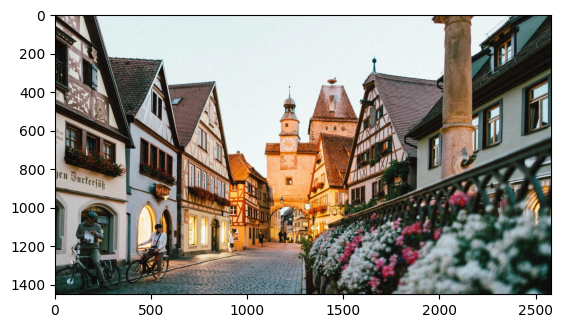

In [50]:
imshow(img_data)

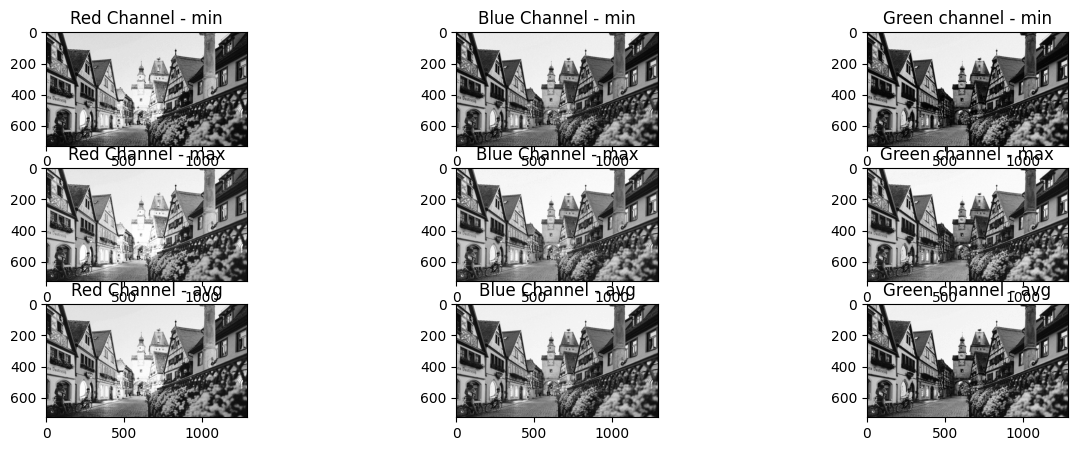

In [ ]:
size_d = 2
import matplotlib.pyplot as plt

img_data = np.asarray(img1)



a0 = conv_pooling(img_data[:, :, 0], pool='min', d=size_d)
b0 = conv_pooling(img_data[:, :, 1], pool='min', d=size_d)
c0 = conv_pooling(img_data[:, :, 2], pool='min', d=size_d)

a1 = conv_pooling(img_data[:, :, 0], pool='max', d=size_d)
b1 = conv_pooling(img_data[:, :, 1], pool='max', d=size_d)
c1 = conv_pooling(img_data[:, :, 2], pool='max', d=size_d)

a2 = conv_pooling(img_data[:, :, 0], pool='avg', d=size_d)
b2 = conv_pooling(img_data[:, :, 1], pool='avg', d=size_d)
c2 = conv_pooling(img_data[:, :, 2], pool='avg', d=size_d)

# plot 3 image in one figure
fig, ax = plt.subplots(3, 3, figsize=(15, 5))

ax[0][0].imshow(a0, cmap='gray')
ax[0][0].set_title('Red Channel - min')
ax[0][1].imshow(b0, cmap='gray')
ax[0][1].set_title('Blue Channel - min')
ax[0][2].imshow(c0, cmap='gray')
ax[0][2].set_title('Green channel - min')

ax[1][0].imshow(a1, cmap='gray')
ax[1][0].set_title('Red Channel - max')
ax[1][1].imshow(b1, cmap='gray')
ax[1][1].set_title('Blue Channel - max')
ax[1][2].imshow(c1, cmap='gray')
ax[1][2].set_title('Green channel - max')

ax[2][0].imshow(a2, cmap='gray')
ax[2][0].set_title('Red Channel - avg')
ax[2][1].imshow(b2, cmap='gray')
ax[2][1].set_title('Blue Channel - avg')
ax[2][2].imshow(c2, cmap='gray')
ax[2][2].set_title('Green channel - avg')

plt.show()

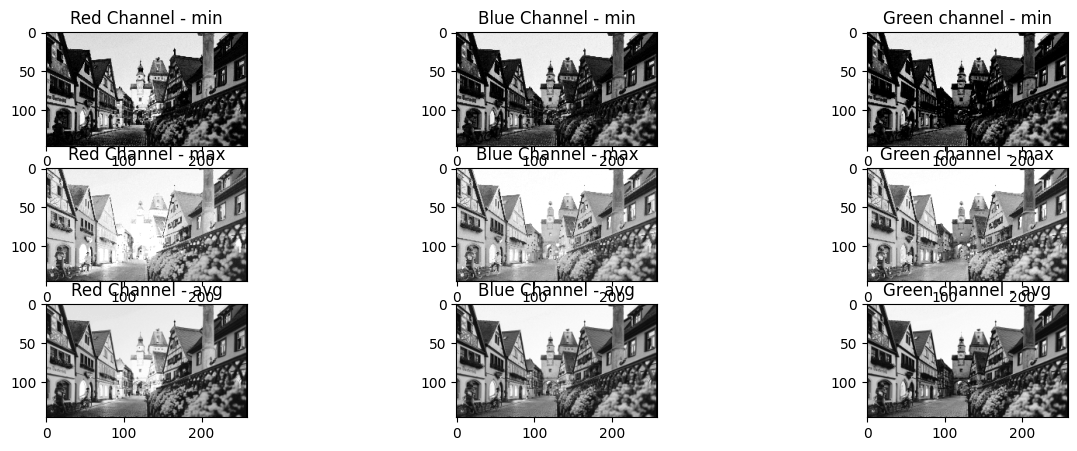

In [ ]:
size_d = 10
img_data = np.asarray(img1)



a0 = conv_pooling(img_data[:, :, 0], pool='min', d=size_d)
b0 = conv_pooling(img_data[:, :, 1], pool='min', d=size_d)
c0 = conv_pooling(img_data[:, :, 2], pool='min', d=size_d)

a1 = conv_pooling(img_data[:, :, 0], pool='max', d=size_d)
b1 = conv_pooling(img_data[:, :, 1], pool='max', d=size_d)
c1 = conv_pooling(img_data[:, :, 2], pool='max', d=size_d)

a2 = conv_pooling(img_data[:, :, 0], pool='avg', d=size_d)
b2 = conv_pooling(img_data[:, :, 1], pool='avg', d=size_d)
c2 = conv_pooling(img_data[:, :, 2], pool='avg', d=size_d)

# plot 3 image in one figure
fig, ax = plt.subplots(3, 3, figsize=(15, 5))

ax[0][0].imshow(a0, cmap='gray')
ax[0][0].set_title('Red Channel - min')
ax[0][1].imshow(b0, cmap='gray')
ax[0][1].set_title('Blue Channel - min')
ax[0][2].imshow(c0, cmap='gray')
ax[0][2].set_title('Green channel - min')

ax[1][0].imshow(a1, cmap='gray')
ax[1][0].set_title('Red Channel - max')
ax[1][1].imshow(b1, cmap='gray')
ax[1][1].set_title('Blue Channel - max')
ax[1][2].imshow(c1, cmap='gray')
ax[1][2].set_title('Green channel - max')

ax[2][0].imshow(a2, cmap='gray')
ax[2][0].set_title('Red Channel - avg')
ax[2][1].imshow(b2, cmap='gray')
ax[2][1].set_title('Blue Channel - avg')
ax[2][2].imshow(c2, cmap='gray')
ax[2][2].set_title('Green channel - avg')

plt.show()

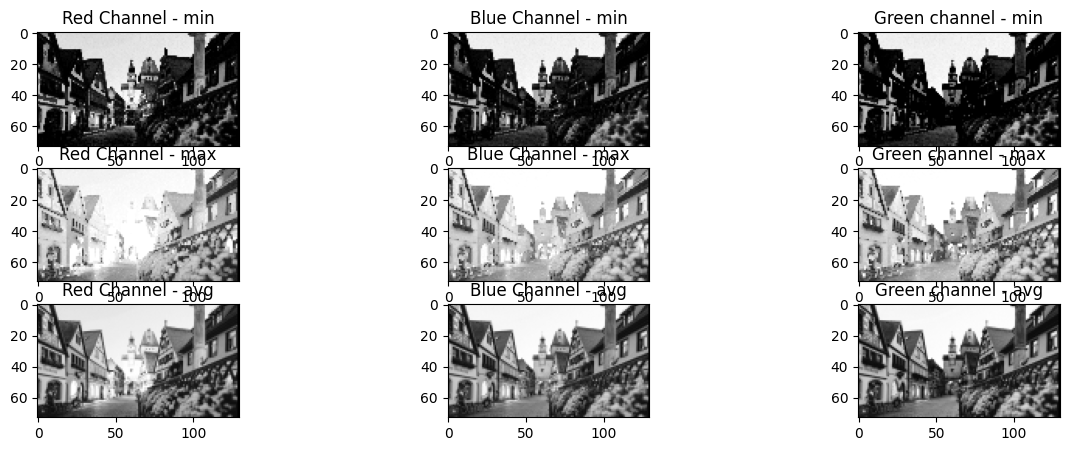

In [ ]:
size_d = 20
img_data = np.asarray(img1)



a0 = conv_pooling(img_data[:, :, 0], pool='min', d=size_d)
b0 = conv_pooling(img_data[:, :, 1], pool='min', d=size_d)
c0 = conv_pooling(img_data[:, :, 2], pool='min', d=size_d)

a1 = conv_pooling(img_data[:, :, 0], pool='max', d=size_d)
b1 = conv_pooling(img_data[:, :, 1], pool='max', d=size_d)
c1 = conv_pooling(img_data[:, :, 2], pool='max', d=size_d)

a2 = conv_pooling(img_data[:, :, 0], pool='avg', d=size_d)
b2 = conv_pooling(img_data[:, :, 1], pool='avg', d=size_d)
c2 = conv_pooling(img_data[:, :, 2], pool='avg', d=size_d)

# plot 3 image in one figure
fig, ax = plt.subplots(3, 3, figsize=(15, 5))

ax[0][0].imshow(a0, cmap='gray')
ax[0][0].set_title('Red Channel - min')
ax[0][1].imshow(b0, cmap='gray')
ax[0][1].set_title('Blue Channel - min')
ax[0][2].imshow(c0, cmap='gray')
ax[0][2].set_title('Green channel - min')

ax[1][0].imshow(a1, cmap='gray')
ax[1][0].set_title('Red Channel - max')
ax[1][1].imshow(b1, cmap='gray')
ax[1][1].set_title('Blue Channel - max')
ax[1][2].imshow(c1, cmap='gray')
ax[1][2].set_title('Green channel - max')

ax[2][0].imshow(a2, cmap='gray')
ax[2][0].set_title('Red Channel - avg')
ax[2][1].imshow(b2, cmap='gray')
ax[2][1].set_title('Blue Channel - avg')
ax[2][2].imshow(c2, cmap='gray')
ax[2][2].set_title('Green channel - avg')

plt.show()

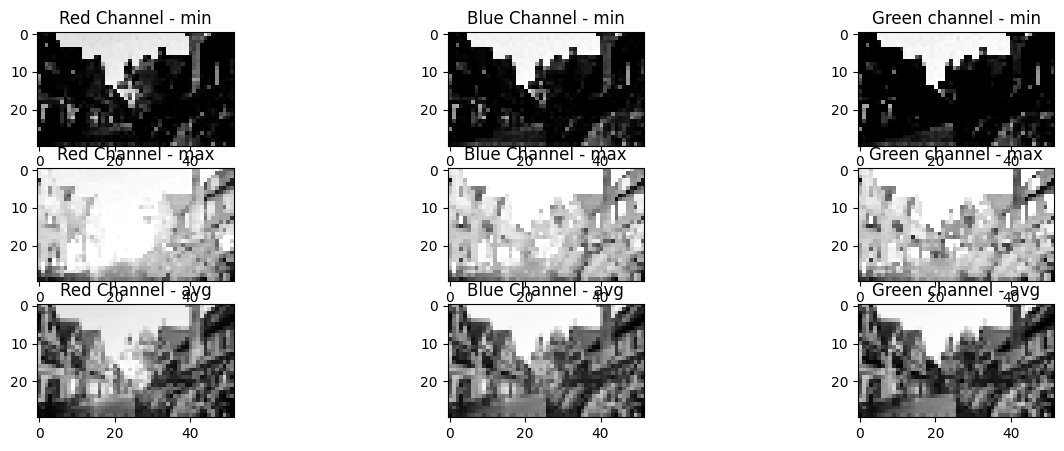

In [ ]:
size_d = 50
img_data = np.asarray(img1)



a0 = conv_pooling(img_data[:, :, 0], pool='min', d=size_d)
b0 = conv_pooling(img_data[:, :, 1], pool='min', d=size_d)
c0 = conv_pooling(img_data[:, :, 2], pool='min', d=size_d)

a1 = conv_pooling(img_data[:, :, 0], pool='max', d=size_d)
b1 = conv_pooling(img_data[:, :, 1], pool='max', d=size_d)
c1 = conv_pooling(img_data[:, :, 2], pool='max', d=size_d)

a2 = conv_pooling(img_data[:, :, 0], pool='avg', d=size_d)
b2 = conv_pooling(img_data[:, :, 1], pool='avg', d=size_d)
c2 = conv_pooling(img_data[:, :, 2], pool='avg', d=size_d)

# plot 3 image in one figure
fig, ax = plt.subplots(3, 3, figsize=(15, 5))

ax[0][0].imshow(a0, cmap='gray')
ax[0][0].set_title('Red Channel - min')
ax[0][1].imshow(b0, cmap='gray')
ax[0][1].set_title('Blue Channel - min')
ax[0][2].imshow(c0, cmap='gray')
ax[0][2].set_title('Green channel - min')

ax[1][0].imshow(a1, cmap='gray')
ax[1][0].set_title('Red Channel - max')
ax[1][1].imshow(b1, cmap='gray')
ax[1][1].set_title('Blue Channel - max')
ax[1][2].imshow(c1, cmap='gray')
ax[1][2].set_title('Green channel - max')

ax[2][0].imshow(a2, cmap='gray')
ax[2][0].set_title('Red Channel - avg')
ax[2][1].imshow(b2, cmap='gray')
ax[2][1].set_title('Blue Channel - avg')
ax[2][2].imshow(c2, cmap='gray')
ax[2][2].set_title('Green channel - avg')

plt.show()